In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers,datasets


In [2]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

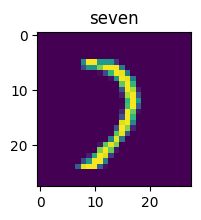

In [5]:
#lets visualize and take a look on our dataset
def show(x,y,index):
  categories=['zero','one','two','three','four','five','six','seven','eight','nine',]
  plt.figure(figsize=(10,2))
  plt.imshow(x[index])
  plt.title(categories[y[index]])
show(X_train,y_train,140)

In [6]:
#scaling
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train[55]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.1472 - accuracy: 0.9546
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0483 - accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0325 - accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0247 - accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0187 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0093 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.00

In [11]:
y_pred=model.predict(X_test)
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.9919


[0.032459571957588196, 0.9919000267982483]

In [16]:
y_pred=[np.argmax(element) for element in y_pred]

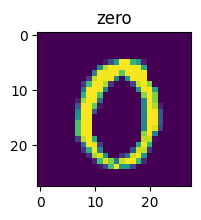

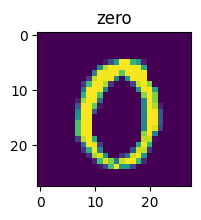

In [19]:
show(X_test,y_test,13)
show(X_test,y_pred,13)

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np



print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(95.72222222222221, 0.5, 'Truth')

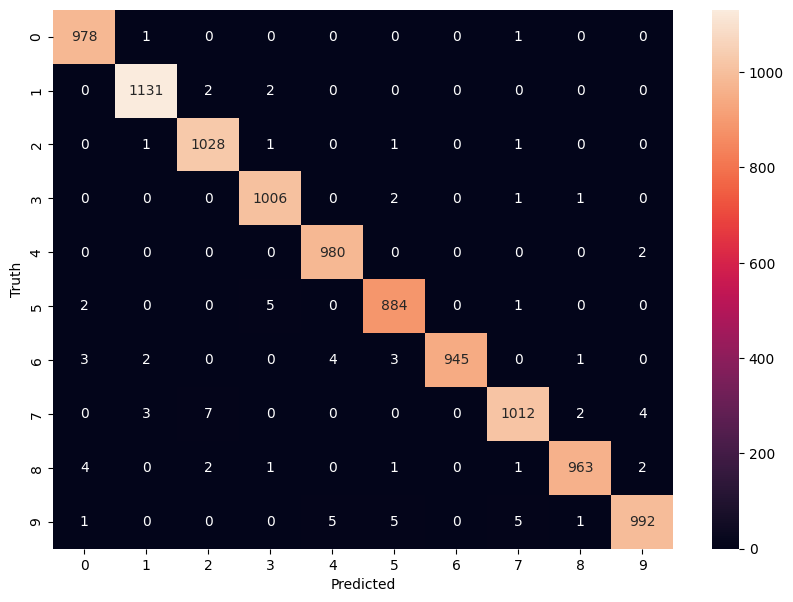

In [22]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')